odict_keys(['encuesta_df_agg'])
multiclass


[Text(0.4772727272727273, 0.9166666666666666, 'x[13] <= -1.725\ngini = 0.999\nsamples = 1780\nvalue = [1, 1, 1 ... 1, 1, 1]'),
 Text(0.21363636363636362, 0.75, 'x[5] <= 1.5\ngini = 0.976\nsamples = 48\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.08181818181818182, 0.5833333333333334, 'x[4] <= 3.5\ngini = 0.79\nsamples = 9\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.03636363636363636, 0.4166666666666667, 'x[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.01818181818181818, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.05454545454545454, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.12727272727272726, 0.4166666666666667, 'x[2] <= 1.5\ngini = 0.72\nsamples = 5\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.09090909090909091, 0.25, 'x[3] <= 2.5\ngini = 0.667\nsamples = 3\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(0.07272727272727272, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0 ... 0, 0, 0]'),
 Text(

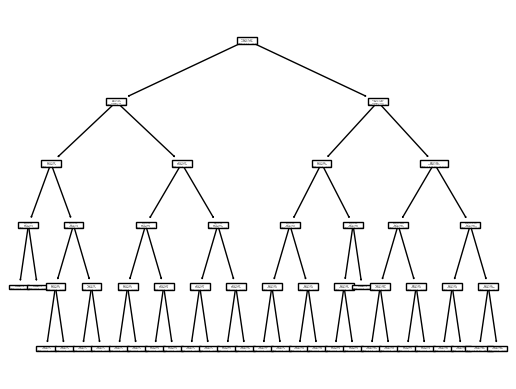

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, utils, tree
import pyreadr
import pandas as pd
import graphviz
import matplotlib.pyplot as plt

# BASE DE DATOS
## Como la base está en un archivo RData, se utiliza el paquete de pyreadr para poder leerlo en Python.

result = pyreadr.read_r("C:/Users/mespinoza/Documents/SAExML/data/ingreso/encuesta_df_agg.Rdata")
print(result.keys())
base = result["encuesta_df_agg"]
## Ahora se crea la base de datos de entrenamiento y de prueba
## Revisamos que la base de datos esté completa
base.head()
list(base.columns)

X = base.drop(base.columns[6], axis=1)
y = base.iloc[:, 6]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state= 25)
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)
print(utils.multiclass.type_of_target(y_train))


clf = tree.DecisionTreeClassifier(max_depth= 5)
clf = clf.fit(X_train, y_train)


tree.plot_tree(clf)

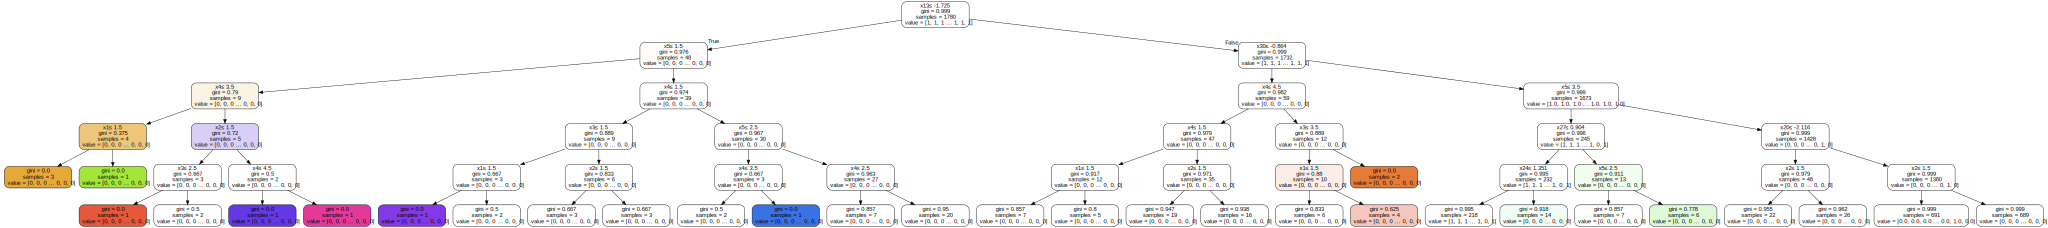

In [2]:
dot_data = tree.export_graphviz(clf, out_file=None,
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 